<a href="https://colab.research.google.com/github/gaaj-ufrpe/pisi3-bsi-ufrpe/blob/main/Intro_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Dataset

In [26]:
# prompt: Import the iris dataset from the scikit learn convert it to a pandas dataframe including the target names.  Show its first 10 rows, then show the name and type of each column.

from sklearn import datasets
import pandas as pd

# Load the iris dataset
iris = datasets.load_iris()

# Create a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

# Show the first 10 rows
print(df.head(10))

# Show the name and type of each column
print(df.dtypes)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4    

In [27]:
# prompt: From now on, consider that previous cells were executed. Print the values available in column species.

# There is no column named species, assuming target_names is meant
print(df['target_names'].unique())


['setosa' 'versicolor' 'virginica']


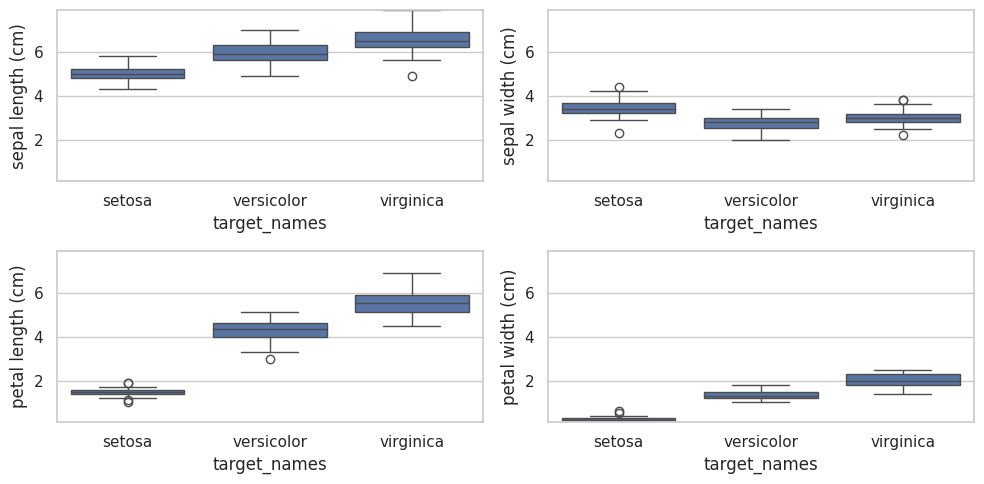

In [34]:
# prompt: Create a boxplot for each length and width column grouped by species, using a different color for each species. Show these plots in a grid of two rows by two columns, where the entire picture is 10 x 5. Make the axis range of all plots equal.

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Create boxplots for each length and width column
sns.boxplot(x='target_names', y='sepal length (cm)', data=df, ax=axes[0, 0])
sns.boxplot(x='target_names', y='sepal width (cm)', data=df, ax=axes[0, 1])
sns.boxplot(x='target_names', y='petal length (cm)', data=df, ax=axes[1, 0])
sns.boxplot(x='target_names', y='petal width (cm)', data=df, ax=axes[1, 1])

# Set the axis range for all plots
y_min = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].min().min()
y_max = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].max().max()
for ax in axes.flatten():
  ax.set_ylim(y_min, y_max)

# Display the plot
plt.tight_layout()
plt.show()


In [38]:
# prompt: Create a knn classifier to predict the species based on columns sepal_length, sepal_width, petal width, and petal_length. Show the results for the train set, then show the result for the test set for each class.

from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()

# Create a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df['target'], test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = knn.predict(X_train)

# Print the results for the training set
print("Training Set Results:")
print(classification_report(y_train, y_train_pred, target_names=iris.target_names))
print(confusion_matrix(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Print the results for the test set
print("\nTest Set Results:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))
print(confusion_matrix(y_test, y_test_pred))


Training Set Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.93      0.93        41
   virginica       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]

Test Set Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [39]:
# prompt: Create a random forest classifier to predict the species based on columns sepal_length, sepal_width, petal width, and petal_length. Show the results for the train set, then show the result for the test set for each class.

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Print the results for the training set
print("Training Set Results (Random Forest):")
print(classification_report(y_train, y_train_pred, target_names=iris.target_names))
print(confusion_matrix(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Print the results for the test set
print("\nTest Set Results (Random Forest):")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))
print(confusion_matrix(y_test, y_test_pred))


Training Set Results (Random Forest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        41
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]

Test Set Results (Random Forest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


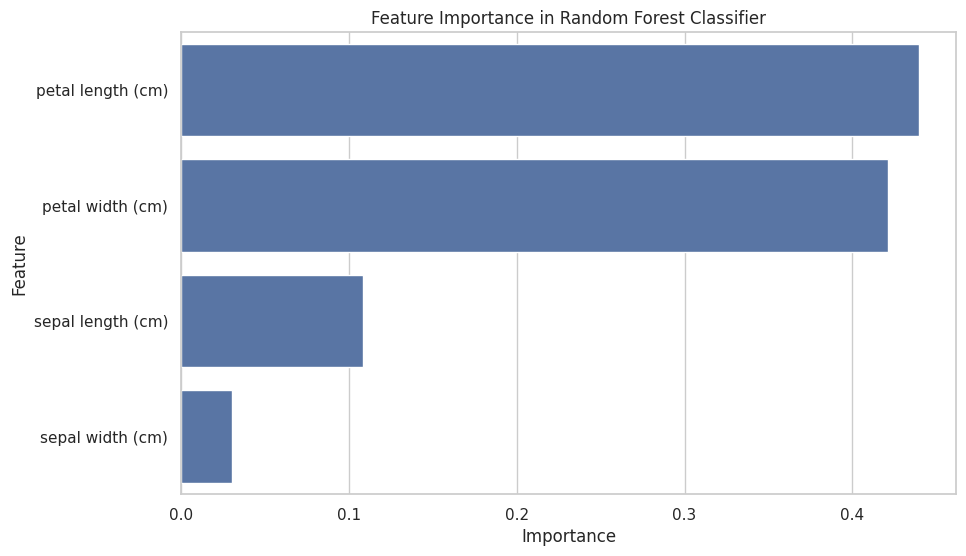

In [40]:
# prompt: create a feature importance description for the RF classifier trained above.

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


# Titanic Dataset

In [58]:
# prompt: Consider that no cell was executed until this point and that library was imported until this point. So, import any lib that you need from now on. Import the titanic dataset, convert it to a pandas dataframe, show a sample of 10 rows, and then show the type of each column. include the target column in the dataframe.

import pandas as pd
from sklearn.datasets import fetch_openml

# Import the titanic dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)

# Create a pandas DataFrame
df = titanic.data
df['survived'] = titanic.target

# Show a sample of 10 rows
print(df.sample(10))

# Show the type of each column
print(df.dtypes)


      pclass                                               name     sex   age  \
3        1.0               Allison, Mr. Hudson Joshua Creighton    male  30.0   
1002     3.0                                McCoy, Miss. Alicia  female   NaN   
477      2.0                              Lamb, Mr. John Joseph    male   NaN   
623      3.0                 Andersson, Miss. Ebba Iris Alfrida  female   6.0   
846      3.0                                    Hampe, Mr. Leon    male  20.0   
912      3.0                                  Karaic, Mr. Milan    male  30.0   
382      2.0  Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...  female   NaN   
654      3.0                                Baccos, Mr. Raffull    male  20.0   
811      3.0            Ford, Mrs. Edward (Margaret Ann Watson)  female  48.0   
605      3.0                      Abelseth, Mr. Olaus Jorgensen    male  25.0   

      sibsp  parch        ticket      fare    cabin embarked  boat   body  \
3       1.0    2.0        11378

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [59]:
# prompt: Show the unique values of columns embarked, sex, and pclass.

# Show the unique values of columns embarked, sex, and pclass.
print(df['embarked'].unique())
print(df['sex'].unique())
print(df['pclass'].unique())


['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']
['female', 'male']
Categories (2, object): ['female', 'male']
[1. 2. 3.]


In [19]:
# prompt: print an explanation for each column, describing its content

# Column explanations for the Titanic dataset:

# pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
# survived: Survival (0 = No, 1 = Yes)
# name: Passenger name
# sex: Passenger sex (male or female)
# age: Passenger age in years
# sibsp: Number of siblings/spouses aboard the Titanic
# parch: Number of parents/children aboard the Titanic
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# boat: Lifeboat number (if survived)
# body: Body identification number (if did not survive)
# home.dest: Home/destination of the passenger


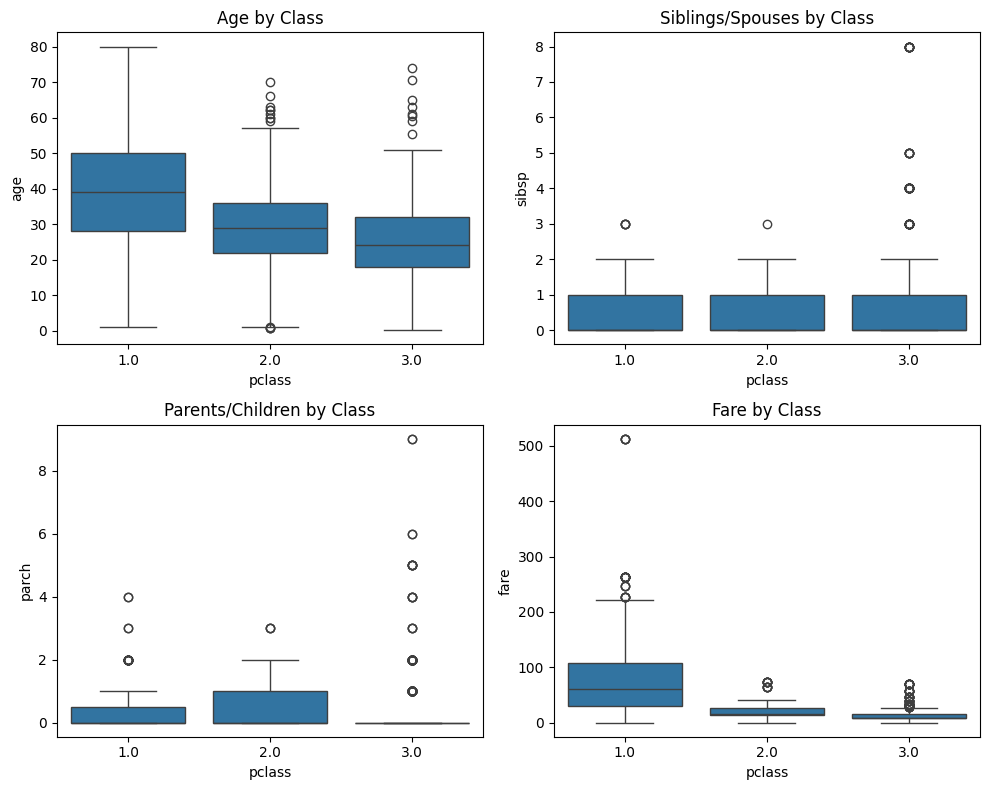

In [60]:
# prompt: Create a boxplot for columns age, sbisp, parch, and fare, grouped by class, keeping the same color for each class. Show them in a 2 X 2 grid.

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Create boxplots for age, sibsp, parch, and fare, grouped by class
sns.boxplot(x='pclass', y='age', data=df, ax=axes[0, 0])
sns.boxplot(x='pclass', y='sibsp', data=df, ax=axes[0, 1])
sns.boxplot(x='pclass', y='parch', data=df, ax=axes[1, 0])
sns.boxplot(x='pclass', y='fare', data=df, ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title('Age by Class')
axes[0, 1].set_title('Siblings/Spouses by Class')
axes[1, 0].set_title('Parents/Children by Class')
axes[1, 1].set_title('Fare by Class')

# Display the plot
plt.tight_layout()
plt.show()


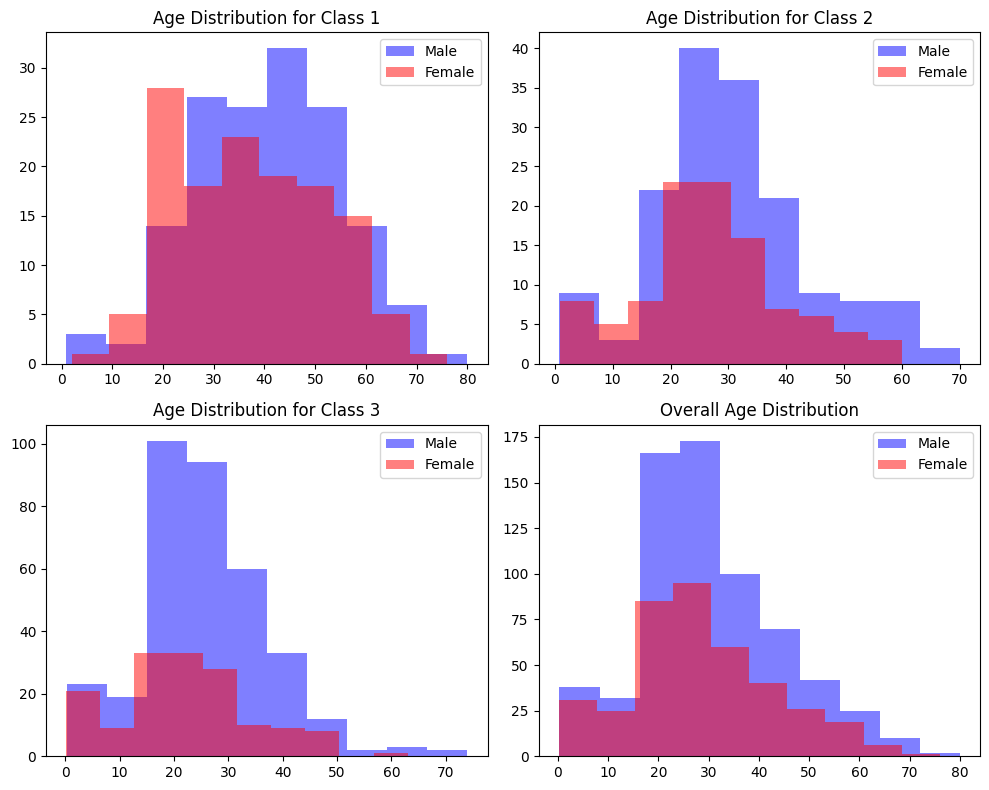

In [61]:
# prompt: Plot also a 2 X 2 grid showing a histogram for males and females, where each cell shows the histogram for a class and a global one. Plot the histograms overlaped with opacity 0.5, using blue for males and red for females.

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over classes and plot histograms for males and females
for i, pclass in enumerate([1, 2, 3]):
    # Filter data for the current class
    df_class = df[df['pclass'] == pclass]

    # Plot histograms for males and females
    axes[i // 2, i % 2].hist(df_class[df_class['sex'] == 'male']['age'].dropna(), color='blue', alpha=0.5, label='Male')
    axes[i // 2, i % 2].hist(df_class[df_class['sex'] == 'female']['age'].dropna(), color='red', alpha=0.5, label='Female')

    # Set title and legend
    axes[i // 2, i % 2].set_title(f'Age Distribution for Class {pclass}')
    axes[i // 2, i % 2].legend()

# Plot overall histograms for males and females
axes[1, 1].hist(df[df['sex'] == 'male']['age'].dropna(), color='blue', alpha=0.5, label='Male')
axes[1, 1].hist(df[df['sex'] == 'female']['age'].dropna(), color='red', alpha=0.5, label='Female')

# Set title and legend for the overall histogram
axes[1, 1].set_title('Overall Age Distribution')
axes[1, 1].legend()

# Display the plot
plt.tight_layout()
plt.show()


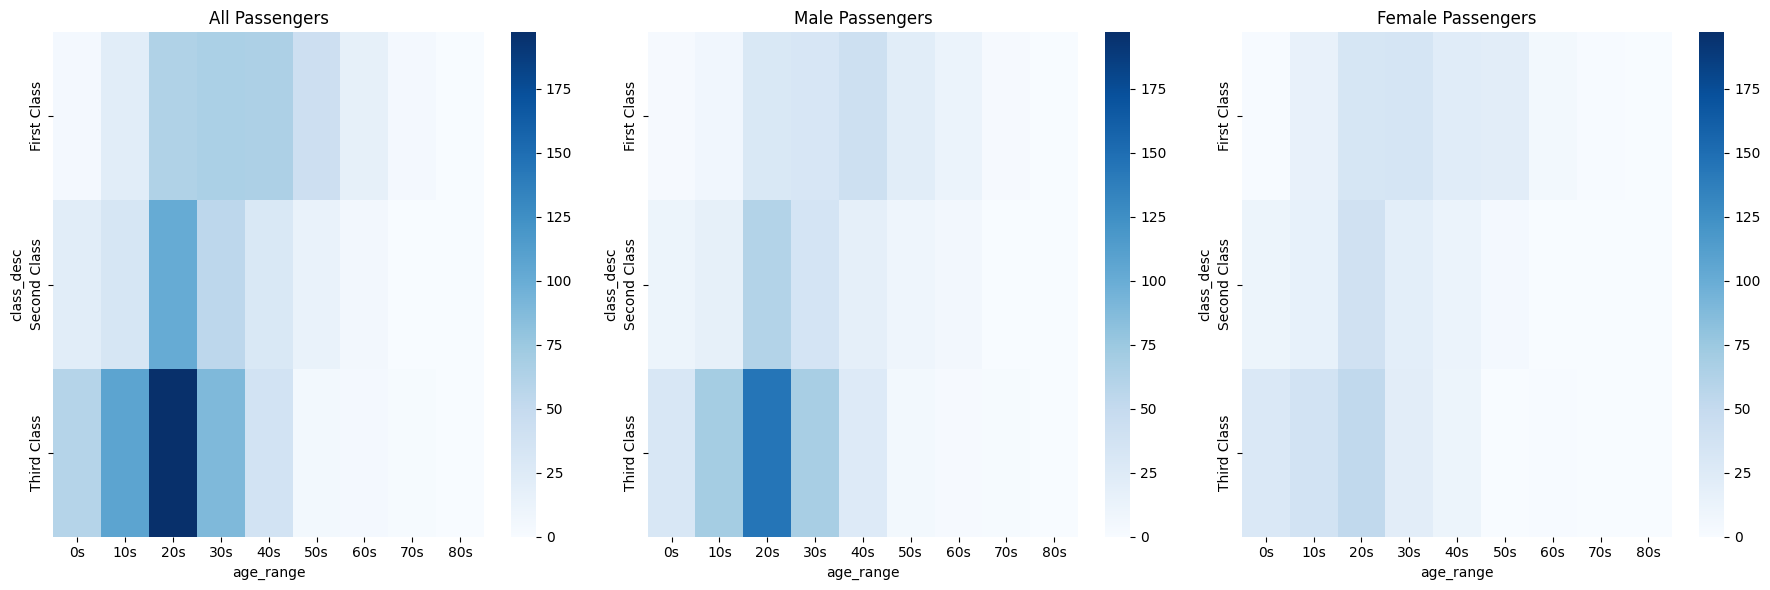

In [62]:
# prompt: Create a column age_range to represent the decade of the age of the person. Map the value of the class to a column class_description. Show a heatmap for all passengers, one for males and another one for females. Use a scale of blues for the heat, set the age_range on the x-axis, and the class_desc on the y-axis. Share the same scale range between the plots.

# Create age_range column
df['age_range'] = pd.cut(df['age'], bins=range(0, 100, 10), labels=[f"{i}s" for i in range(0, 90, 10)])

# Map class values to class descriptions
class_mapping = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
df['class_desc'] = df['pclass'].map(class_mapping)

# Create pivot tables for heatmaps
heatmap_data = df.pivot_table(index='class_desc', columns='age_range', values='survived', aggfunc='count')
heatmap_data_male = df[df['sex'] == 'male'].pivot_table(index='class_desc', columns='age_range', values='survived', aggfunc='count')
heatmap_data_female = df[df['sex'] == 'female'].pivot_table(index='class_desc', columns='age_range', values='survived', aggfunc='count')

# Find the maximum value for consistent color scaling
vmax = max(heatmap_data.max().max(), heatmap_data_male.max().max(), heatmap_data_female.max().max())

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(heatmap_data, cmap='Blues', ax=axes[0], vmin=0, vmax=vmax)
axes[0].set_title('All Passengers')

sns.heatmap(heatmap_data_male, cmap='Blues', ax=axes[1], vmin=0, vmax=vmax)
axes[1].set_title('Male Passengers')

sns.heatmap(heatmap_data_female, cmap='Blues', ax=axes[2], vmin=0, vmax=vmax)
axes[2].set_title('Female Passengers')

plt.tight_layout()
plt.show()


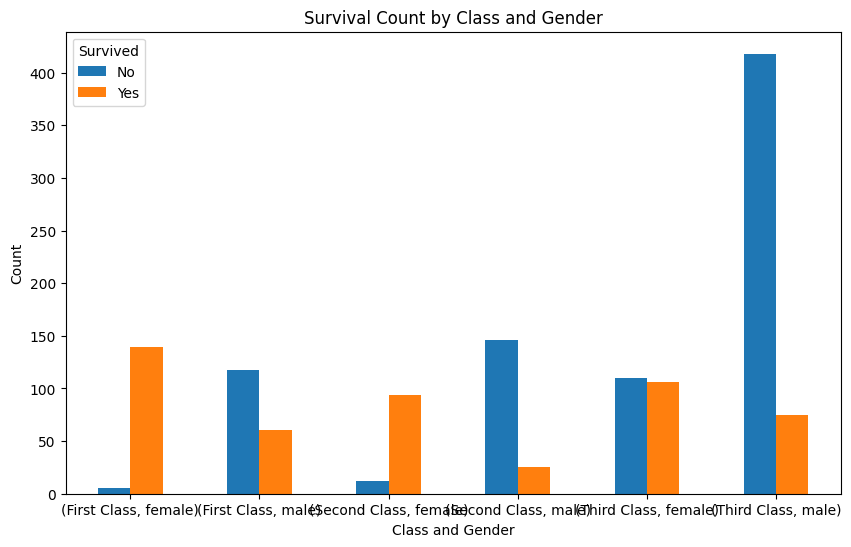

In [63]:
# prompt: show a plot to show the amount of people that lived or died grouped by class_desc and gender.

# Group the DataFrame by 'class_desc' and 'sex', and count the number of survivors and non-survivors
grouped = df.groupby(['class_desc', 'sex', 'survived'])['survived'].count().unstack()

# Plot the grouped data
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Count by Class and Gender')
plt.xlabel('Class and Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


PLOT FEI DANADO! ME ENSINA A FAZER MELHOR!

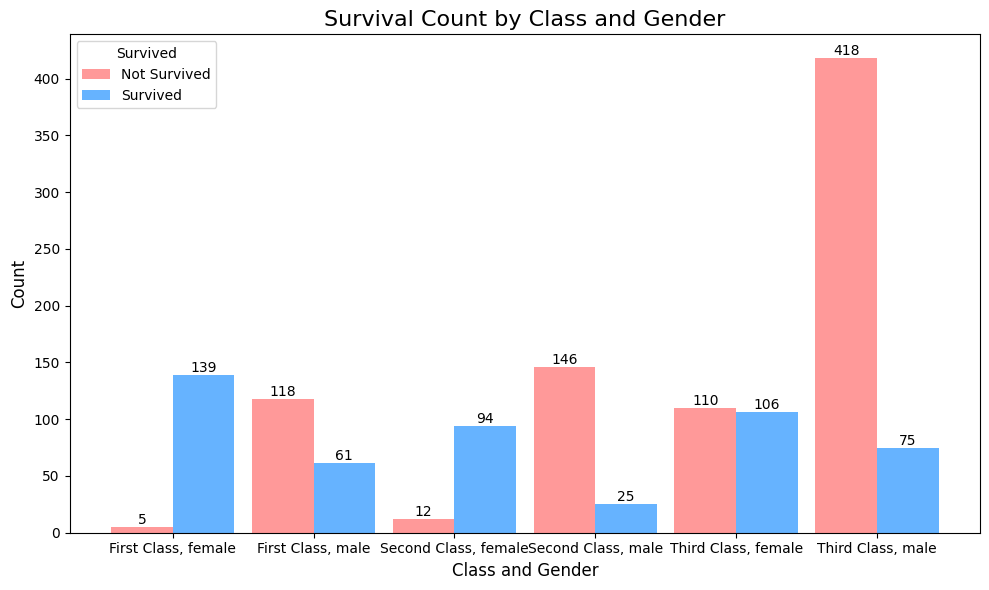

In [64]:
# prompt: PLOT FEI DANADO (acima)! FAZ MELHOR!

# Group the DataFrame by 'class_desc' and 'sex', and count the number of survivors and non-survivors
grouped = df.groupby(['class_desc', 'sex', 'survived'])['survived'].count().unstack()

# Plot the grouped data with better styling
fig, ax = plt.subplots(figsize=(10, 6))

# Set a color palette
colors = ['#ff9999', '#66b3ff']  # Light red and blue

# Plot bars with spacing and adjusted width
width = 0.35  # Width of each bar
spacing = 0.1  # Spacing between groups

# Iterate through classes and genders, plotting bars for survivors and non-survivors
for i, (index, row) in enumerate(grouped.iterrows()):
    class_desc, sex = index
    survived = row[1] if not pd.isna(row[1]) else 0
    not_survived = row[0] if not pd.isna(row[0]) else 0

    # Calculate bar positions
    x1 = i * (2 * width + spacing)
    x2 = x1 + width

    # Plot bars
    ax.bar(x1, not_survived, width, label='Not Survived' if i == 0 else None, color=colors[0])
    ax.bar(x2, survived, width, label='Survived' if i == 0 else None, color=colors[1])

    # Add text labels above bars
    ax.text(x1, not_survived, str(int(not_survived)), ha='center', va='bottom')
    ax.text(x2, survived, str(int(survived)), ha='center', va='bottom')

# Set title, labels, and legend
ax.set_title('Survival Count by Class and Gender', fontsize=16)
ax.set_xlabel('Class and Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks([i * (2 * width + spacing) + width / 2 for i in range(len(grouped))])
ax.set_xticklabels([f"{c}, {s}" for c, s in grouped.index], fontsize=10)
ax.legend(title='Survived', fontsize=10)

# Remove grid
ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


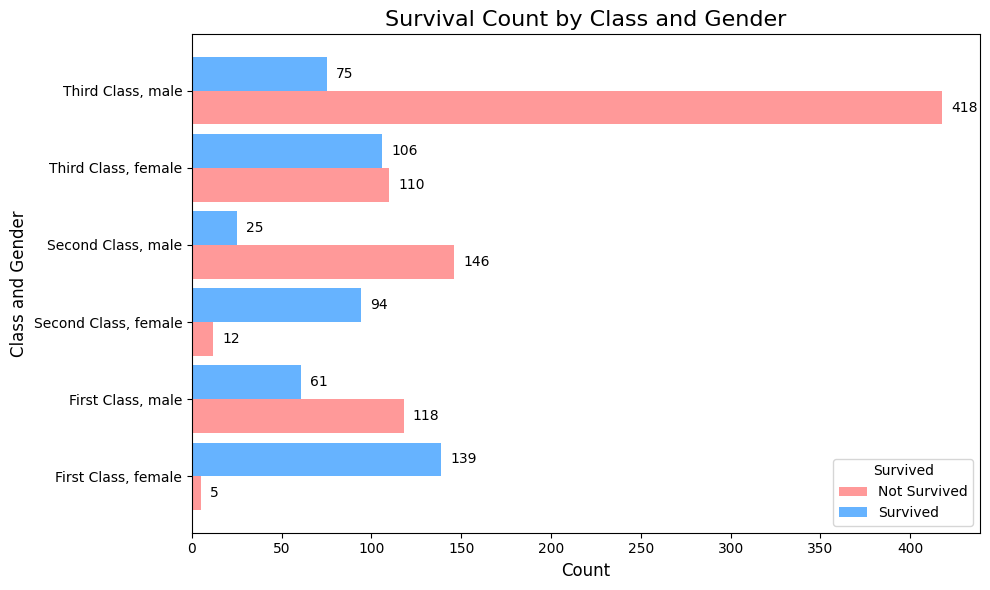

In [65]:
# prompt: inverte os eixos x e y do gráfico acima.

# Group the DataFrame by 'class_desc' and 'sex', and count the number of survivors and non-survivors
grouped = df.groupby(['class_desc', 'sex', 'survived'])['survived'].count().unstack()

# Plot the grouped data with better styling
fig, ax = plt.subplots(figsize=(10, 6))

# Set a color palette
colors = ['#ff9999', '#66b3ff']  # Light red and blue

# Plot bars with spacing and adjusted width
width = 0.35  # Width of each bar
spacing = 0.1  # Spacing between groups

# Iterate through classes and genders, plotting bars for survivors and non-survivors
for i, (index, row) in enumerate(grouped.iterrows()):
    class_desc, sex = index
    survived = row[1] if not pd.isna(row[1]) else 0
    not_survived = row[0] if not pd.isna(row[0]) else 0

    # Calculate bar positions
    y1 = i * (2 * width + spacing)
    y2 = y1 + width

    # Plot horizontal bars (inverted axes)
    ax.barh(y1, not_survived, width, label='Not Survived' if i == 0 else None, color=colors[0])
    ax.barh(y2, survived, width, label='Survived' if i == 0 else None, color=colors[1])

    # Add text labels next to bars
    ax.text(not_survived + 5, y1, str(int(not_survived)), va='center')
    ax.text(survived + 5, y2, str(int(survived)), va='center')

# Set title, labels, and legend
ax.set_title('Survival Count by Class and Gender', fontsize=16)
ax.set_ylabel('Class and Gender', fontsize=12)
ax.set_xlabel('Count', fontsize=12)
ax.set_yticks([i * (2 * width + spacing) + width / 2 for i in range(len(grouped))])
ax.set_yticklabels([f"{c}, {s}" for c, s in grouped.index], fontsize=10)
ax.legend(title='Survived', fontsize=10)

# Remove grid
ax.grid(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# prompt: obrigado!

# de nada!


In [66]:
# prompt: Selecione as colunas classe, sexo, idade, cabine e survived e crie um novo dataframe copiado do original.

# Seleciona as colunas desejadas e cria um novo DataFrame
new_df = df[['pclass', 'sex', 'age', 'cabin', 'survived']].copy()

# Exibe o novo DataFrame
print(new_df.head())


   pclass     sex      age    cabin survived
0     1.0  female  29.0000       B5        1
1     1.0    male   0.9167  C22 C26        1
2     1.0  female   2.0000  C22 C26        0
3     1.0    male  30.0000  C22 C26        0
4     1.0  female  25.0000  C22 C26        0


In [71]:
# prompt: Troque o tipo das colunas categóricas para inteiro, incluindo a coluna survived.

# Converte as colunas categóricas para inteiro usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df['sex'] = le.fit_transform(new_df['sex'])
new_df['cabin'] = le.fit_transform(new_df['cabin'])
new_df['survived'] = le.fit_transform(new_df['survived'])

# Converte a coluna 'pclass' para inteiro (assumindo que já é numérica)
new_df['pclass'] = new_df['pclass'].astype(int)

# Preenche os valores ausentes na coluna 'age' com a média
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())

# Exibe o DataFrame com os tipos atualizados
print(new_df.head())
print(new_df.dtypes)


   pclass  sex      age  cabin  survived
0       0    0  29.0000      0         1
1       0    0   0.9167      1         1
2       0    0   2.0000      1         0
3       0    0  30.0000      1         0
4       0    0  25.0000      1         0
pclass        int64
sex           int64
age         float64
cabin         int64
survived      int64
dtype: object


Resultados do Conjunto de Treino:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       665
           1       0.81      0.47      0.59       382

    accuracy                           0.77      1047
   macro avg       0.78      0.70      0.72      1047
weighted avg       0.78      0.77      0.75      1047

[[624  41]
 [203 179]]

Resultados do Conjunto de Teste:
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       144
           1       0.72      0.36      0.48       118

    accuracy                           0.65       262
   macro avg       0.68      0.62      0.61       262
weighted avg       0.67      0.65      0.62       262

[[128  16]
 [ 76  42]]
  Feature  Importance
0  pclass    0.694902
3   cabin    0.154338
2     age    0.150759
1     sex    0.000000


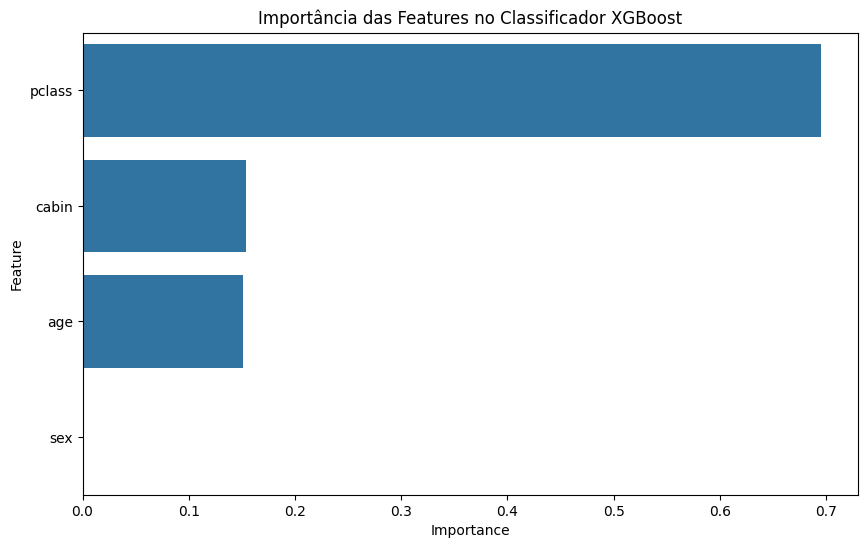

In [72]:
# prompt: Crie um classificador usando o XGBoost para descobrir se a pessoa sobreviveu ou morreu com base nas demais colunas. Em seguida apresente os resultados por classe (sobreviveu ou nao sobreviveu) para os conjuntos de treino e de teste. Por fim, apresente um gráfico da feature importance.

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separe as features (X) e o target (y)
X = new_df.drop('survived', axis=1)
y = new_df['survived']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo XGBoost
model = xgb.XGBClassifier()

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões no conjunto de treino
y_train_pred = model.predict(X_train)

# Imprima os resultados para o conjunto de treino
print("Resultados do Conjunto de Treino:")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Faça previsões no conjunto de teste
y_test_pred = model.predict(X_test)

# Imprima os resultados para o conjunto de teste
print("\nResultados do Conjunto de Teste:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# Obtenha a importância das features
importances = model.feature_importances_

# Crie um DataFrame para visualização
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordene o DataFrame por importância
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Imprima a importância das features
print(feature_importance_df)

# Plote a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features no Classificador XGBoost')
plt.show()


In [78]:
# prompt: O resultado acima não ficou bom. Voce pode usar outro classificador para melhorar o resultado? Você pode criar um novo dataframe importando outras colunas do dataframe original. Caso queira, também pode usar outras estratégias de encoding, normalização e padronização. Se lembre de converter as colunas categóricas, incluindo a coluna target. Substitua quaisquer valores NaN pela media da coluna.

from sklearn.preprocessing import StandardScaler

# Cria um novo DataFrame com mais colunas
new_df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']].copy()

# Converte as colunas categóricas para numérico usando One-Hot Encoding
new_df = pd.get_dummies(new_df, columns=['sex', 'embarked'])

# Converte a coluna 'pclass' para inteiro (assumindo que já é numérica)
new_df['pclass'] = new_df['pclass'].astype(int)

# Preenche os valores ausentes na coluna 'age' e 'fare' com a média
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())
new_df['fare'] = new_df['fare'].fillna(new_df['fare'].mean())

# Converte a coluna target 'survived' para inteiro
new_df['survived'] = new_df['survived'].astype(int)

# Separa as features (X) e o target (y)
X = new_df.drop('survived', axis=1)
y = new_df['survived']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza as features numéricas usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cria o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_test_pred = model.predict(X_test)

# Imprime os resultados para o conjunto de teste
print("\nResultados do Conjunto de Teste (Random Forest):")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))



Resultados do Conjunto de Teste (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       144
           1       0.80      0.68      0.73       118

    accuracy                           0.78       262
   macro avg       0.78      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

[[124  20]
 [ 38  80]]


In [81]:
# prompt: Faça a mesma coisa acima para o SVM, o KNN, o Naive Bayes e para o Catboost.

# SVM
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred_svm = model_svm.predict(X_test)

print("\nResultados do Conjunto de Teste (SVM):")
print(classification_report(y_test, y_test_pred_svm))
print(confusion_matrix(y_test, y_test_pred_svm))

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Você pode ajustar o número de vizinhos
model_knn.fit(X_train, y_train)
y_test_pred_knn = model_knn.predict(X_test)

print("\nResultados do Conjunto de Teste (KNN):")
print(classification_report(y_test, y_test_pred_knn))
print(confusion_matrix(y_test, y_test_pred_knn))

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_test_pred_nb = model_nb.predict(X_test)

print("\nResultados do Conjunto de Teste (Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb))
print(confusion_matrix(y_test, y_test_pred_nb))

# Catboost
!pip install catboost
from catboost import CatBoostClassifier

model_catboost = CatBoostClassifier(iterations=100,  # Você pode ajustar o número de iterações
                                     learning_rate=0.1,
                                     depth=5,
                                     loss_function='Logloss',
                                     verbose=False)  # Desativa a saída detalhada
model_catboost.fit(X_train, y_train)
y_test_pred_catboost = model_catboost.predict(X_test)

print("\nResultados do Conjunto de Teste (Catboost):")
print(classification_report(y_test, y_test_pred_catboost))
print(confusion_matrix(y_test, y_test_pred_catboost))



Resultados do Conjunto de Teste (SVM):
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       144
           1       0.88      0.57      0.69       118

    accuracy                           0.77       262
   macro avg       0.80      0.75      0.75       262
weighted avg       0.80      0.77      0.76       262

[[135   9]
 [ 51  67]]

Resultados do Conjunto de Teste (KNN):
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       144
           1       0.78      0.64      0.70       118

    accuracy                           0.76       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.76      0.76      0.75       262

[[122  22]
 [ 42  76]]

Resultados do Conjunto de Teste (Naive Bayes):
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       144
           1       0.76      0.69      0.72       118

    accu